In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
raw_data = pd.read_csv('datasets_222487_478477_framingham.csv')
raw_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Preprocessing

In [10]:
print('Number of null values in each column')
print(raw_data.isnull().sum())

print()
columns_with_null_values = []
for i in range(len(raw_data.columns)):
    if raw_data[raw_data.columns[i]].isnull().sum() > 0:
        columns_with_null_values.append(raw_data.columns[i])
print('Columns with null values: ', columns_with_null_values)

Number of null values in each column
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Columns with null values:  ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [11]:
for i in range(len(columns_with_null_values)):
    print(columns_with_null_values[i], raw_data[columns_with_null_values[i]].unique())

education [ 4.  2.  1.  3. nan]
cigsPerDay [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds [ 0.  1. nan]
totChol [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176. 163. 191. 263. 196. 310. 164. 135. 238. 207. 342. 287. 182. 352.
 284. 217. 203. 262. 129. 155. 323. 206. 283. 319. 304. 340. 328. 280.
 368. 218. 276. 339. 231. 198. 177. 201. 277. 184. 199. 168. 292. 305.
 306. 15

### Filling NAN with mode
* Filled up NAN with mode, for the numerical columns which have less than 5 unique values
* After this method 2 out of 7 columns are filled with mode

In [13]:
for i in range(len(columns_with_null_values)):
    a = len(raw_data[columns_with_null_values[i]].unique())
    if a <= 5:
        raw_data[columns_with_null_values[i]].fillna(raw_data[columns_with_null_values[i]].mode()[0], inplace=True)
raw_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Filling up null values using median or mean
* If the absolute difference between median and mean is low, then we fill null with mean values. However if absolute difference between median and mean is high, then median is used to fill the null rows.
* After this process, there are no null values in the columns 

In [15]:
for i in range(len(columns_with_null_values)):
    a = len(raw_data[columns_with_null_values[i]].unique())
    mean_value = raw_data[columns_with_null_values[i]].mean()
    median_value = raw_data[columns_with_null_values[i]].median()
    if a > 10:
        if abs(mean_value - median_value) < 100:
#             print("fill with mean values for column: ",listed_columns_numeric_1[i] )
            raw_data[columns_with_null_values[i]] = raw_data[columns_with_null_values[i]].fillna(mean_value)
        else:
#             print("fill with median values for column: ", listed_columns_numeric_1[i])
            raw_data[columns_with_null_values[i]] = raw_data[columns_with_null_values[i]].fillna(median_value)
raw_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [16]:
print('Number of null values in each column')
print(raw_data.isnull().sum())

Number of null values in each column
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Random Forest algorithm

In [44]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()    

# function for random forest algorithm classifier

def rand_forest_classifier(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,:-1].values
    dependent_column = raw_data.iloc[:,-1].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)

    m = RandomForestClassifier(n_jobs=-1)
    m.fit(X_train, y_train)

    predTree = m.predict(X_valid)
    print()
    print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')

    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    plot_confusion_matrix(m, X_valid, y_valid)
    plt.title('Confusion Matrix')
    plt.show()
    
    

Training data:  (3391, 15) (3391,)
Validation data:  (847, 15) (847,)

Training accuracy:  100.0 %

Validation accuracy:  85.48 %


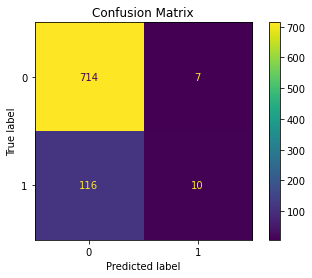

In [45]:
raw_data = shuffle(raw_data)
rand_forest_classifier(raw_data = raw_data,
                       validation_split = 0.2)

### Logistic Regression

In [46]:
def log_regression(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,:-1].values
    dependent_column = raw_data.iloc[:,-1].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)


    model = LogisticRegression()
    model.fit(X_train, y_train)
    predTree = model.predict(X_valid)
    print('Training accuracy: ', round((model.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((model.score(X_valid, y_valid))*100,2),'%')   
    
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    
    plot_confusion_matrix(model, X_valid, y_valid)
    plt.title('Confusion Matrix')
    plt.show()

Training data:  (3391, 15) (3391,)
Validation data:  (847, 15) (847,)
Training accuracy:  84.87 %

Validation accuracy:  85.12 %


C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


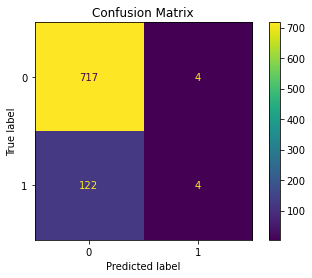

In [47]:
raw_data = shuffle(raw_data)
log_regression(raw_data = raw_data,
                       validation_split = 0.2)